In [12]:
import pandas as pd

In [15]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

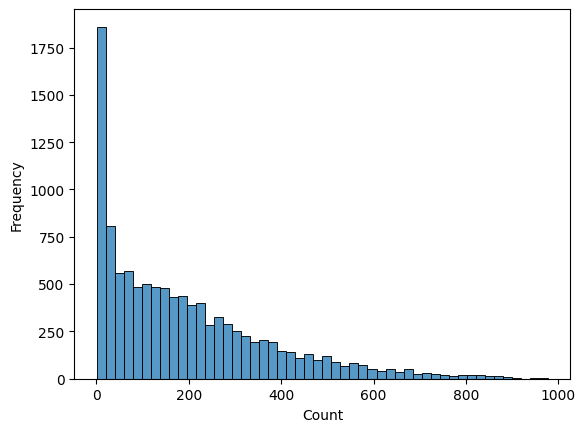

In [18]:
sns.histplot(df['count'], bins=50)
plt.xlabel('Distribution of Bike rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [20]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek
df.drop('datetime', axis=1, inplace=True)

In [22]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,2012,2


In [23]:
X = df.drop(['casual', 'registered', 'count'], axis=1)
y = df['count']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=100.0))
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=100.0))])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 141.19400882272666
R² Score: 0.3960133649197751


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", -grid.best_score_)


Best alpha: {'ridge__alpha': 100}
Best score: 141.86213840070735
